# Lab03 - Handwritten digit classification
In this assignment we will use the PyTorch framework to build NN that solves a classification problem, in particular we will classify the digits in the MNIST datset.

First, let's import the dataset from the matlab file.

True label of this digit is 0


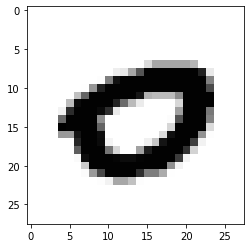

In [314]:
import torch 
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import time

# load the MNIST dataset
data = sio.loadmat('../data/MNIST.mat')
labels = data['output_labels']
digits = data['input_images']

# Plot one digit and its label
item=0
print('True label of this digit is', int(labels[item]))
plt.imshow(np.reshape(digits[item],(28,28)), cmap='Greys')
plt.show()

In [9]:
# Split train and test data

perc_split = 0.85

X_train = torch.Tensor(digits[ : int(perc_split*len(digits))])
X_test  = torch.Tensor(digits[int(perc_split*len(digits)) : ])
y_train = torch.LongTensor(labels[ : int(perc_split*len(labels))]).squeeze()
y_test  = torch.LongTensor(labels[int(perc_split*len(labels)) : ]).squeeze()
print(y_train)

tensor([0, 8, 4,  ..., 4, 3, 9])


### Neural network class definition

Let's define the network structure: we will use 2 hidden layers, the activation function will be given as an argument suring the network initialization and the network can return the most probable label for the input digit if requested (in addition to the estimated probability of each label).

In [10]:
class NN_model(nn.Module):
    
    def __init__(self, Ni, Nh1, Nh2, No, dropout=0.5, act_func=nn.LeakyReLU()):
        super().__init__()
        
        self.fc1 = nn.Linear(Ni, Nh1)
        self.fc2 = nn.Linear(Nh1, Nh2)
        self.fc3 = nn.Linear(Nh2, No)
        
        self.drop = nn.Dropout(dropout)
        self.act  = act_func
        
    def forward(self, x, additional_out=False):
        
        x = self.drop(self.act(self.fc1(x)))
        x = self.drop(self.act(self.fc2(x)))
        out = self.fc3(x)    # since we will use the cross entropy as loss function, we don't
                             # need a softmax activation function for the last layer
        if additional_out:
            return out, x
        
        return out

The most intuitive way for measuring the performance of a NN for a classification problem is through accuracy, but since it is not differentiable, it is not directly usable in the training of the network. </br>
For this reason, the used loss function will be `nn.CrossEntropyLoss()` and the accuracy will be used only as a metric.


In [11]:
# Define loss function
loss_fn = nn.CrossEntropyLoss()

Now we try to do a simple training of the network above

In [17]:
# Initialize the network
net = NN_model(784, 256, 128, 10)

# Define the ADAM optimizer for updating the network weights
optimizer = optim.Adam(net.parameters(), lr = 0.001, weight_decay = 0.0001)

# train the network for 100 epochs
num_epochs = 200
train_loss_log = []
test_loss_log = []

for epoch in range(num_epochs):
    print('Epoch', epoch + 1)
    
    # Training procedure
    net.train()
    optimizer.zero_grad()
    net_output = net(X_train)
    loss = loss_fn(net_output, y_train)
    loss.backward()
    optimizer.step()
    
    # Print loss
    print('\t Training loss:', float(loss.data))

    # test network at the current epoch
    net.eval() # Evaluation mode (e.g. disable dropout)
    with torch.no_grad(): # No need to track the gradients
        
        net_output = net(X_test)
        
        # Evaluate global loss and print it
        test_loss = loss_fn(net_output, y_test)
        print('\t Test loss:', float(test_loss.data))
        
    # Log
    train_loss_log.append(float(loss.data))
    test_loss_log.append(float(test_loss.data))
    

Epoch 1
	 Training loss: 2.304375171661377
	 Test loss: 2.264312505722046
Epoch 2
	 Training loss: 2.2678937911987305
	 Test loss: 2.2232086658477783
Epoch 3
	 Training loss: 2.230422019958496
	 Test loss: 2.172828197479248
Epoch 4
	 Training loss: 2.1849312782287598
	 Test loss: 2.1102797985076904
Epoch 5
	 Training loss: 2.130904197692871
	 Test loss: 2.0355000495910645
Epoch 6
	 Training loss: 2.066007614135742
	 Test loss: 1.949608564376831
Epoch 7
	 Training loss: 1.9930022954940796
	 Test loss: 1.8535288572311401
Epoch 8
	 Training loss: 1.9108705520629883
	 Test loss: 1.7485915422439575
Epoch 9
	 Training loss: 1.8246681690216064
	 Test loss: 1.6372276544570923
Epoch 10
	 Training loss: 1.7331624031066895
	 Test loss: 1.522754192352295
Epoch 11
	 Training loss: 1.6367924213409424
	 Test loss: 1.4085094928741455
Epoch 12
	 Training loss: 1.5428197383880615
	 Test loss: 1.297398328781128
Epoch 13
	 Training loss: 1.4510856866836548
	 Test loss: 1.1913435459136963
Epoch 14
	 Traini

	 Training loss: 0.2500862181186676
	 Test loss: 0.1821243017911911
Epoch 108
	 Training loss: 0.24777324497699738
	 Test loss: 0.1808103322982788
Epoch 109
	 Training loss: 0.24799852073192596
	 Test loss: 0.17955654859542847
Epoch 110
	 Training loss: 0.24535110592842102
	 Test loss: 0.17838668823242188
Epoch 111
	 Training loss: 0.24367906153202057
	 Test loss: 0.1773093342781067
Epoch 112
	 Training loss: 0.24428904056549072
	 Test loss: 0.1762768030166626
Epoch 113
	 Training loss: 0.2410632073879242
	 Test loss: 0.1751651018857956
Epoch 114
	 Training loss: 0.23887977004051208
	 Test loss: 0.17402341961860657
Epoch 115
	 Training loss: 0.23582860827445984
	 Test loss: 0.1729147881269455
Epoch 116
	 Training loss: 0.23667027056217194
	 Test loss: 0.1718301624059677
Epoch 117
	 Training loss: 0.23362387716770172
	 Test loss: 0.17080096900463104
Epoch 118
	 Training loss: 0.2343146651983261
	 Test loss: 0.16975408792495728
Epoch 119
	 Training loss: 0.2324066162109375
	 Test loss: 0

Final accuracy: 0.9655555555555555


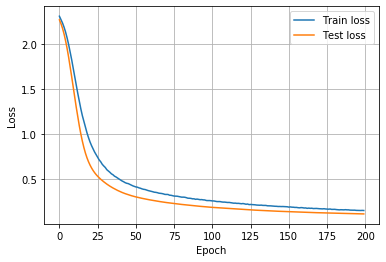

In [18]:
# Compute final accuracy
correct_answers = [np.argmax(net_output[i])==y_test[i] for i in range(len(y_test))]
print('Final accuracy:', np.sum(correct_answers)/len(y_test))

# Plot losses
plt.close('all')
plt.plot(train_loss_log, label='Train loss')
plt.plot(test_loss_log, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

## Implement Random Search
First, define class that produces random combinations of parameters values

In [25]:
class Param_generator():
    
    def __init__(self, Nh_limits, drop_limits, 
                 lr_limits, L2_limits, optims, prob_optims):
        
        self.Nh_min = Nh_limits[0]
        self.Nh_max = Nh_limits[1]
        self.drop_min = drop_limits[0]
        self.drop_max = drop_limits[1]
        self.lr_min_exp = lr_limits[0]
        self.lr_max_exp = lr_limits[1]
        self.L2_min_exp = L2_limits[0]
        self.L2_max_exp = L2_limits[1]    
        self.optim_funcs = optims
        self.p_optims = prob_optims
        
    def gen_values(self, n_combins):
        
        Nh1_vals = np.random.randint(self.Nh_min, self.Nh_max, n_combins)
        Nh2_vals = np.random.randint(self.Nh_min, Nh1_vals)
        optims = np.random.choice(self.optim_funcs, n_combins, p=self.p_optims)
        drop_vals = np.random.uniform(self.drop_min, self.drop_max, n_combins)
        lr_vals = 10**(np.random.uniform(self.lr_min_exp, self.lr_max_exp, n_combins))
        L2_vals = 10**(np.random.uniform(self.L2_min_exp, self.L2_max_exp, n_combins))              
        
        combins_list = [ (Nh1_vals[i], Nh2_vals[i], drop_vals[i], 
                          optims[i], lr_vals[i], L2_vals[i]) for i in range(n_combins)]
        
        return combins_list

# initialize parameters generator giving the bounds of each distribution, the optims and their probs
pars_generator = Param_generator( [50,600], [0,0.5], [-4,-1], [-6,-2],
                                  ['optim.Adam', 'optim.RMSprop'], [0.8,0.2])

# Sample some combinations of parameters
params_combinations = pars_generator.gen_values(150)

Then, implement a cross validation training using the cross validation in sklearn, use skorch as interface between pytorch and sklearn.

In [201]:
from sklearn.model_selection import cross_val_score
from skorch import NeuralNet
from skorch.callbacks import EarlyStopping


# RANDOM SEARCH PROCESS
print('Starting Random Search process')
all_scores = np.zeros(len(params_combinations))
start = time.time()

# Execute the Cross Validation to evaluate each combination of parameters
for i in range(len(params_combinations)):
    
    # Evaluate i-th combinaton of parameters
    print('\nTraining combination number', i+1, 'out of', len(params_combinations))
    Nh1,Nh2,dropout,optim_fn,lr,L2_decay = params_combinations[i]
    
    # Create the NN object that can be handled by sklearn using skorch 
    net = NeuralNet(module = NN_model,
                    module__Ni = 784,  module__Nh1 = Nh1,
                    module__Nh2 = Nh2, module__No = 10,
                    module__dropout = dropout,
                    criterion = nn.CrossEntropyLoss,
                    optimizer = eval(optim_fn),
                    optimizer__lr = lr,
                    optimizer__weight_decay = L2_decay,
                    callbacks = [EarlyStopping(patience=15)],
                    max_epochs = 200
                   )

    # Compute scores of each validation set and compute average
    val_scores = cross_val_score(net, X_train.numpy(), y_train.numpy(),
                                 cv=4, n_jobs=-1, scoring = 'neg_log_loss')
    all_scores[i] = val_scores.mean()

    # print results of each combination
    print('Score (Neg_log_loss): ', all_scores[i])
    
    

# Print time needed to complete Randm Search
finish = time.time()
print('\n\n Random Search process took', int(finish-start), 'seconds')

# Sort scores from best to worst and the combinations accordingly
sorted_scores, sorted_params = zip(*sorted(zip(all_scores, params_combinations),reverse=True))


# Save the sorted scores and params combinations in 2 files
with open('sorted_scores.dat', 'w') as f:
    for item in sorted_scores:
        f.write("%s\n" % item)
        
with open('sorted_params.dat', 'w') as f:
    for item in sorted_params:
        f.write("%s,%s,%s,%s,%s,%s\n" % item)

Starting Random Search process

Training combination number 1 out of 150


KeyboardInterrupt: 

In [202]:
# RETRIEVE 'SORTED_SCORES' AND 'SORTED_PARAMS' FROM FILES 

types = int, int, float, str, float, float
with open('sorted_params.dat', 'r') as inputfile:
    sorted_params = [tuple(t(e) for t,e in zip(types, line.split(',')))
                     for line in inputfile]
    
sorted_scores = np.genfromtxt('sorted_scores.dat')

### Final training
Consider the best 15 networks; retrain them using all the training dataset, evaluate their final accuracy using the test dataset and save the one with the highest accuracy as the winner

In [29]:
# First, choose how many network consider for the final training
take_best = 15

# For each network, re-initialize and re-train it with the whole train dataset
for i in range(take_best):
    print('Training',i+1,'out of the best',take_best,'models:')
    
    # Consider tuple parameters corresponding to the wanted index
    Nh1,Nh2,dropout,optim_fn,lr,L2_decay = sorted_params[i]
    
    # Initialize the network
    net = NN_model(784, Nh1, Nh2, 10, dropout)

    # Use the optimizer function with custom parameters
    optimizer = eval(optim_fn)(net.parameters(), lr=lr, weight_decay=L2_decay)

    # train the network for 300 epochs
    num_epochs = 300
    train_loss_log = np.zeros(num_epochs)
    test_loss_log = np.zeros(num_epochs)    

    for epoch in range(num_epochs):

        # Training preocedure
        net.train()
        optimizer.zero_grad()
        net_output = net(X_train)
        loss = loss_fn(net_output, y_train)
        loss.backward()
        optimizer.step()
        
        # Test network at the current epoch
        net.eval() # Evaluation mode (e.g. disable dropout)
        with torch.no_grad(): # No need to track the gradients
            
            # Evaluate global loss and print it
            net_output = net(X_test)
            test_loss = loss_fn(net_output, y_test)
        
        # Log
        train_loss_log[epoch] =  float(loss.data)
        test_loss_log[epoch] = float(test_loss.data)


    # Test network after the training
    with torch.no_grad():
        # Compute final accuracy and print it
        net_output = net(X_test)
        correct_answers = [np.argmax(net_output[i])==y_test[i] for i in range(len(y_test))]
        test_accuracy = np.sum(correct_answers)/len(y_test)
        print('    Final accuracy:', test_accuracy)
        
    # If we achieve the best score, save everything
    if (i==0) or (test_accuracy > best_score):
        best_score = test_accuracy
        best_params = sorted_params[i]
        winning_net = net
        winning_train_log = train_loss_log
        winning_test_log = test_loss_log

        
# Save the winning net (and its weights) to a file    
torch.save(winning_net, 'winning_net.dat')

print('\nThe best network obtained an accuracy of ', best_score, 
      ' and is defined by the params:\n', best_params)


Training 1 out of the best 15 models:
    Final accuracy: 0.977
Training 2 out of the best 15 models:
    Final accuracy: 0.9254444444444444
Training 3 out of the best 15 models:
    Final accuracy: 0.9287777777777778
Training 4 out of the best 15 models:
    Final accuracy: 0.9473333333333334
Training 5 out of the best 15 models:
    Final accuracy: 0.9632222222222222
Training 6 out of the best 15 models:
    Final accuracy: 0.953
Training 7 out of the best 15 models:
    Final accuracy: 0.971
Training 8 out of the best 15 models:
    Final accuracy: 0.923
Training 9 out of the best 15 models:
    Final accuracy: 0.9705555555555555
Training 10 out of the best 15 models:
    Final accuracy: 0.9782222222222222
Training 11 out of the best 15 models:
    Final accuracy: 0.9122222222222223
Training 12 out of the best 15 models:
    Final accuracy: 0.9632222222222222
Training 13 out of the best 15 models:
    Final accuracy: 0.9761111111111112
Training 14 out of the best 15 models:
    Fina

/home/francesco/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type NN_model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/francesco/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/francesco/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Dropout. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/francesco/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LeakyReLU. It won't be checked for correctness upon loading.
  "type " + obj.__

In [227]:
# load the net and analyze test set to check it has been loaded correctly
file_net = torch.load('winning_net.dat')

with torch.no_grad():
    net_output = file_net(X_test)
    correct_answers = [np.argmax(net_output[i])==y_test[i] for i in range(len(y_test))]
    print('Loaded winning_net accuracy:', np.sum(correct_answers)/len(y_test))

Loaded winning_net accuracy: 0.9793333333333333


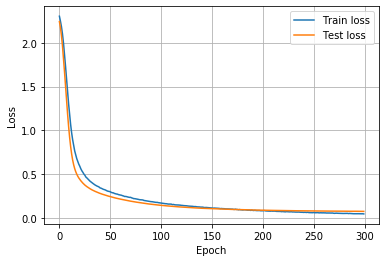

In [33]:
# Plot losses of the winning network
plt.close('all')
plt.plot(winning_train_log, label='Train loss')
plt.plot(winning_test_log, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

## Visualize receptive fields
Let's print the receptive fields of the first 25 neurons of both the hidden layers (and 9 for the output layer). First we extract their weights of the wiining network

In [205]:
fc1_weights = winning_net.fc1.weight.data.t()
fc2_weights = winning_net.fc2.weight.data.t()
fc3_weights = winning_net.fc3.weight.data.t()

Now for each layer we print a single image containing all the receptive fields (it will be a 5x5 grid)

In [103]:
# Preoare empty images that will contain all receptive fields
rec_fields_fc1 = np.zeros([5*28, 5*28])
rec_fields_fc2 = np.zeros([5*28, 5*28])
rec_fields_fc3 = np.zeros([3*28, 3*28])

# Use each receptive field to fill the correspondent portion of the big images
for n in range(25):
    
    # calculate start_x and start_y for hidden layers based on the index
    start_x = (n % 5)*28
    start_y = (n // 5)*28
    
    # receptive fields of first hidden layer is simply given by its weights
    rec_fields_fc1[start_x:start_x + 28, start_y:start_y + 28] = fc1_weights[:,n].reshape(28,28)
    
    # Receptive field of second hidden layer is given by the matmul with fc1_weights
    tmp_rf_fc2 = torch.matmul(fc1_weights, fc2_weights[:,n])
    rec_fields_fc2[start_x:start_x + 28, start_y:start_y + 28] = tmp_rf_fc2.reshape(28,28)
    
    # Do the same thing for the output layer (we show only 9 neurons)
    if (n < 9):
        start_x = (n % 3)*28
        start_y = (n // 3)*28
        
        # receptive fields of the third layer is given by the matmul with previous layers
        tmp_rf_fc3 = torch.matmul( torch.matmul(fc1_weights, fc2_weights),
                                   fc3_weights[:,n] )
        rec_fields_fc3[start_x:start_x + 28, start_y:start_y + 28] = tmp_rf_fc3.reshape(28,28)

Now let's print all the computed receptive fields in three different colormaps (one for each layer)

In [295]:
# THIS FUNCTION IS ONLY NEEDED TO SET THE MID-VALUE OF THE COLOR BAR TO ZERO (see below)
# (Not my function, but it does not compute any result for the exercise)

import matplotlib
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, 
                    single_color=False, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap


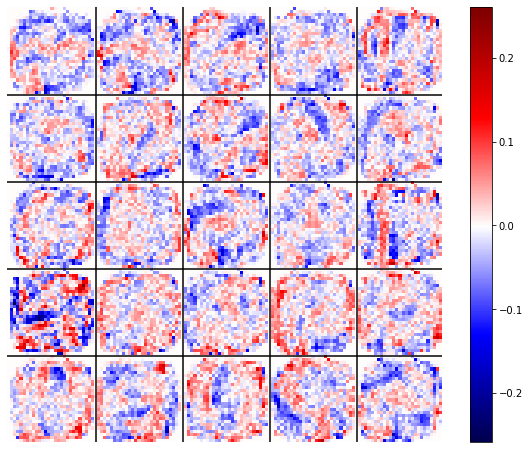

In [296]:
### FIRST LAYER RECEPTION FIELDS

# Build custom colormap using function above
orig_cmap = matplotlib.cm.seismic
min_value = np.min(rec_fields_fc1)
max_value = np.max(rec_fields_fc1)
custom_cmap = shiftedColorMap(orig_cmap, 
                              midpoint = -min_value/(max_value-min_value))

# Plot receptive fields of the FIRST hidden layer
plt.close('all')
plt.figure(figsize=(10,8))
plt.imshow(rec_fields_fc1, cmap=custom_cmap)
plt.axis('off')

for i in range(4):
    plt.axvline(x=(i+1)*28, color='black')
    plt.axhline(y=(i+1)*28, color='black')

plt.colorbar()
plt.show()

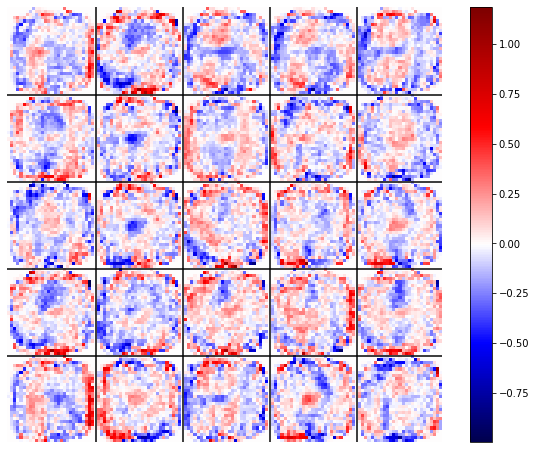

In [297]:
### SECOND LAYER RECEPTION FIELDS

# Build custom colormap using function above
orig_cmap = matplotlib.cm.seismic
min_value = np.min(rec_fields_fc2)
max_value = np.max(rec_fields_fc2)
custom_cmap = shiftedColorMap(orig_cmap, 
                              midpoint = -min_value/(max_value-min_value))

# Plot receptive fields of the SECOND hidden layer
plt.close('all')
plt.figure(figsize=(10,8))
plt.imshow(rec_fields_fc2, cmap=custom_cmap)
plt.axis('off')

for i in range(4):
    plt.axvline(x=(i+1)*28, color='black')
    plt.axhline(y=(i+1)*28, color='black')

plt.colorbar()
plt.show()

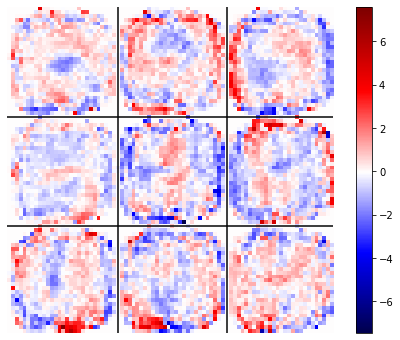

In [298]:
### OUTPUT LAYER RECEPTION FIELDS

# Build custom colormap using function above
orig_cmap = matplotlib.cm.seismic
min_value = np.min(rec_fields_fc3)
max_value = np.max(rec_fields_fc3)
custom_cmap = shiftedColorMap(orig_cmap, 
                              midpoint = -min_value/(max_value-min_value))

# Plot receptive fields of the SECOND hidden layer
plt.close('all')
plt.figure(figsize=(8,6))
plt.imshow(rec_fields_fc3, cmap=custom_cmap)
plt.axis('off')

for i in range(2):
    plt.axvline(x=(i+1)*28, color='black')
    plt.axhline(y=(i+1)*28, color='black')

plt.colorbar()
plt.show()

## Gradient ascent over neurons' activations
We will now perform a gradient ascent procedure to find which types of input images will maximize the output of the first 25 neurons of the hidden layers (and 9 of the output layer)

In [236]:
# define operations to compute neuron activations from the input image
def LeakyReLU_fn(x):
    return torch.where(x > 0, x, x * 0.01)

def layer_1(image):
    return LeakyReLU_fn(winning_net.fc1(image))

def layer_2(image):
    return LeakyReLU_fn(winning_net.fc2(
                        LeakyReLU_fn(winning_net.fc1(image))))
def layer_3(image):
    return winning_net.fc3(
           LeakyReLU_fn(winning_net.fc2(
                        LeakyReLU_fn(winning_net.fc1(image)))))


# Prepare empty images that will contain input images that maximize outputs
all_inputs_1 = np.zeros([5*28, 5*28])
all_inputs_2 = np.zeros([5*28, 5*28])
all_inputs_3 = np.zeros([3*28, 3*28])

# Compute images and store them in the corresponding portion of the big images
for l in range(3):

    # Check which layer we are considering
    print('Computing images for layer', l+1)
    if (l==2):
        grid_dim = 3
    else:
        grid_dim = 5
       
    # Compute images and store them in the corresponding portion of the big images
    for n in range(grid_dim**2):

        print('   Image', n + 1,' out of', grid_dim**2)
        input_image = torch.zeros(784, requires_grad= True)

        for i in range(500):
            activ_values = layer_3(image) #eval('layer_'+str(l+1))(input_image)[n]
            activ_values.backward()
            input_image.data = input_image.data + 0.01*input_image.grad.data
            input_image.grad.data.zero_()

        final_image = input_image.reshape(28,28).detach().numpy()

        # calculate start_x and start_y based on the filter index
        start_x = (n % grid_dim)*28
        start_y = (n // grid_dim)*28
        eval('all_inputs_'+str(l+1))[start_x:start_x + 28, start_y:start_y + 28] = final_image

Computing images for layer 1
   Image 1  out of 25
   Image 2  out of 25
   Image 3  out of 25
   Image 4  out of 25
   Image 5  out of 25
   Image 6  out of 25
   Image 7  out of 25
   Image 8  out of 25
   Image 9  out of 25
   Image 10  out of 25
   Image 11  out of 25
   Image 12  out of 25
   Image 13  out of 25
   Image 14  out of 25
   Image 15  out of 25
   Image 16  out of 25
   Image 17  out of 25
   Image 18  out of 25
   Image 19  out of 25
   Image 20  out of 25
   Image 21  out of 25
   Image 22  out of 25
   Image 23  out of 25
   Image 24  out of 25
   Image 25  out of 25
Computing images for layer 2
   Image 1  out of 25
   Image 2  out of 25
   Image 3  out of 25
   Image 4  out of 25
   Image 5  out of 25
   Image 6  out of 25
   Image 7  out of 25
   Image 8  out of 25
   Image 9  out of 25
   Image 10  out of 25
   Image 11  out of 25
   Image 12  out of 25
   Image 13  out of 25
   Image 14  out of 25
   Image 15  out of 25
   Image 16  out of 25
   Image 17  out 

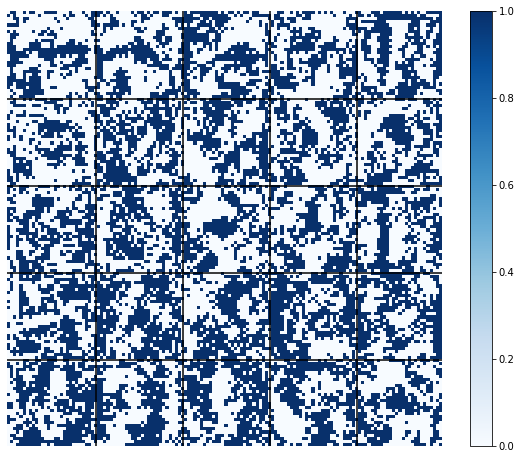

In [336]:
### FIRST LAYER 

# Set to 0 all the pixels that contribute negativly and
# to 1 the ones that have a positive contribute
norm_inputs_1 = np.where(all_inputs_1<0, 0, 1)

# print input images that maximize the neurons
plt.figure(figsize=(10,8))
plt.imshow(norm_inputs_1, cmap = 'Blues')
plt.axis('off')

for i in range(4):
    plt.axvline(x=(i+1)*28, color='black')
    plt.axhline(y=(i+1)*28, color='black')

plt.colorbar()
plt.show()

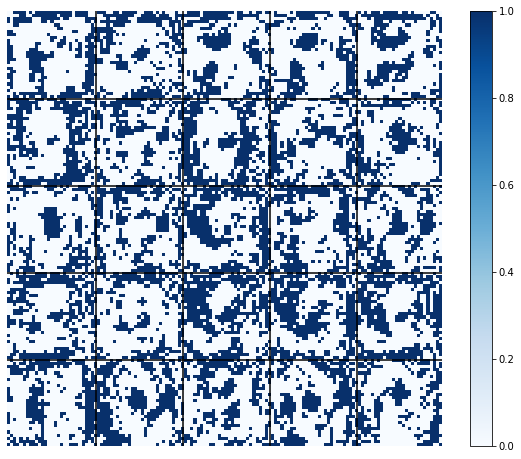

In [335]:
### SECOND LAYER

# Set to 0 all the pixels that contribute negativly and
# to 1 the ones that have a positive contribute
norm_inputs_2 = np.where(all_inputs_2<0, 0, 1)

# print input images that maximize the neurons
plt.figure(figsize=(10,8))
plt.imshow(norm_inputs_2, cmap = 'Blues')
plt.axis('off')

for i in range(4):
    plt.axvline(x=(i+1)*28, color='black')
    plt.axhline(y=(i+1)*28, color='black')

plt.colorbar()
plt.show()

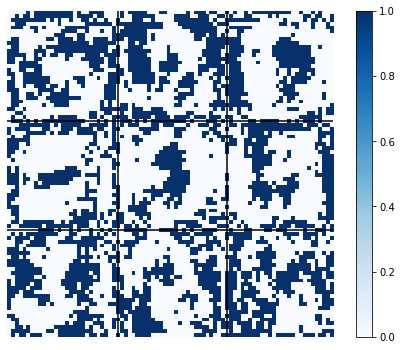

In [333]:
### OUTPUT LAYER

# Set to 0 all the pixels that contribute negativly and
# to 1 the ones that have a positive contribute
norm_inputs_3 = np.where(all_inputs_3<0, 0, 1)

# print input images that maximize the neurons
plt.figure(figsize=(8,6))
plt.imshow(norm_inputs_3, cmap = 'Blues')
plt.axis('off')

for i in range(2):
    plt.axvline(x=(i+1)*28, color='black')
    plt.axhline(y=(i+1)*28, color='black')

plt.colorbar()
plt.show()

The input image that maximize the activation of each neuron is almost equal to its receptive field, the only diffenrence is in the scale od their values. This make sene since the pixels of input image have to mantain the same sign of their corresponding weights to maximize the neuron's output. Moreover the ratio between different weights has been "learned" by the input image, because it learns that increasing the pixel values corresponding to important weights is really impactful, so these values are the ones that grows faster. It has been indeed observed that by increasing the number of iterations of this training the absolute values of the pixels were increasing too, but the ratios were mantained.